
<a id='amss2'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Fluctuating Interest Rates Deliver Fiscal Insurance

## Contents

- [Fluctuating Interest Rates Deliver Fiscal Insurance](#Fluctuating-Interest-Rates-Deliver-Fiscal-Insurance)  
  - [Overview](#Overview)  
  - [Forces at work](#Forces-at-work)  
  - [Logical flow of  lecture](#Logical-flow-of--lecture)  
  - [Example economy](#Example-economy)  
  - [Reverse engineering strategy](#Reverse-engineering-strategy)  
  - [Code for reverse engineering](#Code-for-reverse-engineering)  
  - [Short simulation for reverse-engineered: initial debt](#Short-simulation-for-reverse-engineered:-initial-debt)  
  - [Long simulation](#Long-simulation)  
  - [BEGS approximations of  limiting debt and convergence rate](#BEGS-approximations-of--limiting-debt-and-convergence-rate)  

**Co-authors: Anmol Bhandari and David Evans**

## Overview

This lecture extends our investigations of how optimal policies for levying a flat-rate tax on labor income and  issuing government debt depend
on whether there are complete  markets for debt

A Ramsey allocation and Ramsey policy in the AMSS [[AMSS02]](https://lectures.quantecon.org/py/zreferences.html#amss-2002) model described in [optimal taxation without state-contingent debt](https://lectures.quantecon.org/py/amss.html) generally differs
from a Ramsey allocation and Ramsey policy in the  Lucas-Stokey [[LS83]](https://lectures.quantecon.org/py/zreferences.html#lucasstokey1983) model described in [optimal taxation with state-contingent debt](https://lectures.quantecon.org/py/opt_tax_recur.html)

This is because the implementability restriction that a competitive equilibrium with a distorting tax  imposes on  allocations in the Lucas-Stokey model is just one among a set of
implementability conditions imposed in  the AMSS model

These additional constraints require that time $ t $ components of a Ramsey allocation
for the AMSS model be **measurable** with respect to time $ t-1 $ information

The  measurability constraints imposed by the AMSS model are inherited from the   restriction that  only one-period risk-free bonds
can be traded

Differences between the  Ramsey allocations in the two models   indicate that at least some of the measurability constraints of the AMSS model of
[optimal taxation without state-contingent debt](https://lectures.quantecon.org/py/amss.html) are violated at the Ramsey allocation of a corresponding  [[LS83]](https://lectures.quantecon.org/py/zreferences.html#lucasstokey1983) model with state-contingent debt

Another way to say this is that differences between the Ramsey allocations of the two models indicate that some of the measurability constraints of the
AMSS model are violated at the  Ramsey allocation of the Lucas-Stokey model

Nonzero Lagrange multipliers on those constraints make the Ramsey allocation for the AMSS model differ from the Ramsey allocation for the Lucas-Stokey model

This lecture studies a special  AMSS model in which

- The exogenous state variable $ s_t $ is governed by  a finite-state Markov chain  
- With an arbitrary budget-feasible initial level of government debt, the measurability  constraints  
  - bind for many periods, but $ \ldots $  
  - eventually they stop binding evermore, so $ \ldots $  
  - in the tail of the Ramsey plan, the Lagrange multipliers $ \gamma_t(s^t) $ on the AMSS implementability constraints [(8)](https://lectures.quantecon.org/py/amss.html#equation-ts-gov-wo4)  converge to zero  
- After the implementability constraints [(8)](https://lectures.quantecon.org/py/amss.html#equation-ts-gov-wo4) no longer bind in the tail of the AMSS Ramsey plan  
  - history dependence of the AMSS state variable $ x_t $ vanishes and  $ x_t $ becomes a time-invariant function of the Markov state $ s_t $  
  - the par value of government debt becomes **constant over time** so that $ b_{t+1}(s^t) = \bar b $ for $ t \geq T $ for a sufficiently large $ T $  
  - $ \bar b <0 $, so that the tail of the Ramsey plan instructs  the government always to make a constant par value of risk-free one-period loans to the private sector  
  - the one-period gross interest rate $ R_t(s^t) $ on risk-free debt  converges to a time-invariant function of the Markov state $ s_t $  
- For a **particular** $ b_0 < 0 $ (i.e., a positive level of initial government **loans** to the private sector), the measurability constraints **never** bind  
- In this special case  
  
  - the **par value** $ b_{t+1}(s_t) = \bar b $  of government debt at time $ t $ and Markov state $ s_t $  is constant across time and states,
    but $ \ldots $  
  - the **market value** $ \frac{\bar b}{R_t(s_t)} $ of government debt at time $ t $  varies as a time-invariant function of the Markov state $ s_t $  
  - fluctuations in the interest rate make gross earnings on government debt $ \frac{\bar b}{R_t(s_t)} $ fully insure the gross-of-gross-interest-payments government budget against fluctuations in government expenditures  
  - the state variable $ x $ in a recursive representation of a Ramsey plan is a time invariant function of the Markov state for $ t \geq 0 $  
  
- In this special case, the Ramsey allocation in the AMSS model agrees with that in a [[LS83]](https://lectures.quantecon.org/py/zreferences.html#lucasstokey1983) model in which
  the same amount of state-contingent debt falls due in all states tomorrow  
  - it is a situation in which  the Ramsey planner loses nothing from not being  able to  purchase state-contingent debt and being restricted to exchange only risk-free debt  debt  
- This outcome emerges only when we initialize government debt at a particular $ b_0 < 0 $  


In a nutshell, the reason for this striking outcome is that at a particular level of risk-free government **assets**, fluctuations in the one-period risk-free interest
rate provide the government with complete insurance against stochastically varying government expenditures

## Forces at work

The forces  driving asymptotic  outcomes here are examples of dynamics present in a more general class  incomplete markets models analyzed in [[BEGS17]](https://lectures.quantecon.org/py/zreferences.html#begs1) (BEGS)

BEGS provide conditions under which government debt under a Ramsey plan converges to an invariant distribution

BEGS  construct approximations to that asymptotically invariant  distribution  of government debt under a  Ramsey plan

BEGS also compute an approximation to a Ramsey plan’s rate of convergence  to that limiting invariant distribution

We  shall use the BEGS approximating limiting distribution and the approximating  rate of convergence   to help interpret  outcomes here

For a long time, the Ramsey plan puts a nontrivial martingale-like component into the par value of  government debt as part of the way that the Ramsey plan imperfectly
smooths distortions from the labor tax rate across  time and Markov states

But BEGS show that binding implementability constraints slowly push government debt in a direction designed to let the government use fluctuations in equilibrium interest
rate  rather than fluctuations in  par values of debt to insure against shocks to government expenditures

- This is a **weak** (but unrelenting) force that, starting from an initial debt level, for a long time is dominated by the stochastic martingale-like component of debt
  dynamics that the Ramsey planner uses to facilitate imperfect tax-smoothing across time and states  
- This weak force slowly drives the par value of government **assets** to a **constant** level at which the government can completely insure against government expenditure shocks while
  shutting down the stochastic component of debt dynamics  
- At that point, the tail of the par value of government debt becomes a trivial martingale: it is constant over time  

## Logical flow of  lecture

We present ideas  in the following order

- We describe a two-state  AMSS economy and generate a long simulation starting from a positive  initial government debt  
- We observe that in a long simulation starting from positive government debt, the par value of  government debt eventually converges to a constant $ \bar b $  
- In fact, the par value of government debt  converges to the same constant level $ \bar b $ for alternative realizations of the Markov government expenditure process and for alternative settings of initial government
  debt $ b_0 $  
- We reverse engineer a particular value of initial government debt $ b_0 $ (it turns out to be negative) for which the  continuation debt moves
  to $ \bar b $ immediately  
- We note that for this particular initial debt $ b_0 $, the Ramsey allocations  for the AMSS economy and the Lucas-Stokey model are identical  
  - we verify that the LS Ramsey planner chooses to purchase **identical** claims to time $ t+1 $ consumption for all Markov states tomorrow for each Markov state today  
- We compute the BEGS approximations to check how accurately they describe the dynamics of the long-simulation  

### Equations from Lucas-Stokey (1983) model

Although we are studying an AMSS [[AMSS02]](https://lectures.quantecon.org/py/zreferences.html#amss-2002) economy,  a Lucas-Stokey [[LS83]](https://lectures.quantecon.org/py/zreferences.html#lucasstokey1983) economy plays
an important  role in the reverse-engineering calculation to be described below

For that reason, it is helpful  to have readily available some key equations underlying a Ramsey plan for the Lucas-Stokey economy

Recall first-order conditions for a Ramsey allocation for the Lucas-Stokey economy

For $ t \geq 1 $, these take the form


<a id='equation-ts-barg10a'></a>
$$
\begin{aligned}
  (1+\Phi) &u_c(c,1-c-g) + \Phi \bigl[c u_{cc}(c,1-c-g) -
    (c+g) u_{\ell c}(c,1-c-g) \bigr]
    \\
    &= (1+\Phi) u_{\ell}(c,1-c-g) + \Phi \bigl[c u_{c\ell}(c,1-c-g) -
    (c+g) u_{\ell \ell}(c,1-c-g)  \bigr]
\end{aligned} \tag{1}
$$

There is one such equation for each value of the Markov state $ s_t $

In addition, given an initial Markov state, the time $ t=0 $ quantities $ c_0 $ and $ b_0 $ satisfy


<a id='equation-ts-barg11b'></a>
$$
\begin{aligned}
      (1+\Phi) &u_c(c,1-c-g) + \Phi \bigl[c u_{cc}(c,1-c-g) -
        (c+g) u_{\ell c}(c,1-c-g) \bigr]
        \\
        &= (1+\Phi) u_{\ell}(c,1-c-g) + \Phi \bigl[c u_{c\ell}(c,1-c-g) -
        (c+g) u_{\ell \ell}(c,1-c-g)  \bigr] + \Phi (u_{cc} - u_{c,\ell}) b_0
\end{aligned} \tag{2}
$$

In addition, the time $ t=0 $ budget constraint is satisfied at $ c_0 $ and initial government debt
$ b_0 $:


<a id='equation-eqn-amss2-10'></a>
$$
b_0 + g_0 = \tau_0 (c_0 + g_0) + \frac{\bar b}{R_0} \tag{3}
$$

where $ R_0 $ is the gross interest rate for the Markov state $ s_0 $ that is assumed to prevail at time $ t =0 $
and $ \tau_0 $ is the time $ t=0 $ tax rate

In equation [(3)](#equation-eqn-amss2-10), it is understood that

$$
\begin{gather*}
\tau_0 = 1 - \frac{u_{l,0}}{u_{c,0}} \\
R_0^{-1} =  \beta  \sum_{s=1}^S \Pi(s | s_0) \frac{u_c(s)}{u_{c,0}} \\
\end{gather*}
$$

It is useful to transform  some of the above equations to forms that are more natural for analyzing the
case of a CRRA utility specification that we shall use in our example economies

### Specification with CRRA Utility

As in lectures [optimal taxation without state-contingent debt](https://lectures.quantecon.org/py/amss.html) and [optimal taxation with state-contingent debt](https://lectures.quantecon.org/py/opt_tax_recur.html),
we assume that the  representative agent has  utility function

$$
u(c,n) = {\frac{c^{1-\sigma}}{1-\sigma}} - {\frac{n^{1+\gamma}}{1+\gamma}}
$$

and set  $ \sigma = 2 $, $ \gamma = 2 $, and the  discount factor $ \beta = 0.9 $

We eliminate leisure from the model and continue to assume that

$$
c_t + g_t = n_t
$$

The analysis of Lucas and Stokey prevails once we make the following replacements

$$
\begin{aligned}
u_\ell(c, \ell) &\sim - u_n(c, n) \\
u_c(c,\ell) &\sim u_c(c,n) \\
u_{\ell,\ell}(c,\ell) &\sim u_{nn}(c,n) \\
u_{c,c}(c,\ell)& \sim u_{c,c}(c,n) \\
u_{c,\ell} (c,\ell) &\sim 0 \\
\end{aligned}
$$

With these understandings, equations [(1)](#equation-ts-barg10a) and [(2)](#equation-ts-barg11b) simplify in the case of the CRRA utility function

They become


<a id='equation-amss2-ts-barg10'></a>
$$
(1+\Phi) [u_c(c) + u_n(c+g)] + \Phi[c u_{cc}(c) + (c+g) u_{nn}(c+g)] = 0 \tag{4}
$$

and


<a id='equation-amss2-ts-barg11'></a>
$$
(1+\Phi) [u_c(c_0) + u_n(c_0+g_0)] + \Phi[c_0 u_{cc}(c_0) + (c_0+g_0) u_{nn}(c_0+g_0)] - \Phi u_{cc}(c_0) b_0 = 0 \tag{5}
$$

In equation [(4)](#equation-amss2-ts-barg10), it is understood that $ c $ and $ g $ are each functions of the Markov state $ s $

The CRRA utility function is represented in the following class

In [1]:
import numpy as np


class CRRAutility:

    def __init__(self,
                 β=0.9,
                 σ=2,
                 γ=2,
                 π=0.5*np.ones((2, 2)),
                 G=np.array([0.1, 0.2]),
                 Θ=np.ones(2),
                 transfers=False):

        self.β, self.σ, self.γ = β, σ, γ
        self.π, self.G, self.Θ, self.transfers = π, G, Θ, transfers

    # Utility function
    def U(self, c, n):
        σ = self.σ
        if σ == 1.:
            U = np.log(c)
        else:
            U = (c**(1 - σ) - 1) / (1 - σ)
        return U - n**(1 + self.γ) / (1 + self.γ)

    # Derivatives of utility function
    def Uc(self, c, n):
        return c**(-self.σ)

    def Ucc(self, c, n):
        return -self.σ * c**(-self.σ - 1)

    def Un(self, c, n):
        return -n**self.γ

    def Unn(self, c, n):
        return -self.γ * n**(self.γ - 1)

## Example economy

We set the following parameter values

The Markov state $ s_t $ takes two values, namely,  $ 0,1 $

The initial Markov state is $ 0 $

The Markov transition matrix is $ .5 I $ where $ I $ is a $ 2 \times 2 $ identity matrix, so the $ s_t $ process is i.i.d.

Government expenditures $ g(s) $ equal $ .1 $ in Markov state $ 0 $ and $ .2 $ in Markov state $ 1 $

We set preference parameters as follows:

$$
\begin{aligned}
\beta & = .9 \cr
\sigma & = 2  \cr
\gamma & = 2
\end{aligned}
$$

Here are several classes that do most of the work for us

The code is  mostly taken or adapted from the earlier lectures [optimal taxation without state-contingent debt](https://lectures.quantecon.org/py/amss.html) and
[optimal taxation with state-contingent debt](https://lectures.quantecon.org/py/opt_tax_recur.html)

In [2]:
import numpy as np
from scipy.optimize import root
from quantecon import MarkovChain


class SequentialAllocation:

    '''
    Class that takes CESutility or BGPutility object as input returns
    planner's allocation as a function of the multiplier on the
    implementability constraint μ.
    '''

    def __init__(self, model):

        # Initialize from model object attributes
        self.β, self.π, self.G = model.β, model.π, model.G
        self.mc, self.Θ = MarkovChain(self.π), model.Θ
        self.S = len(model.π)  # Number of states
        self.model = model

        # Find the first best allocation
        self.find_first_best()

    def find_first_best(self):
        '''
        Find the first best allocation
        '''
        model = self.model
        S, Θ, G = self.S, self.Θ, self.G
        Uc, Un = model.Uc, model.Un

        def res(z):
            c = z[:S]
            n = z[S:]
            return np.hstack([Θ * Uc(c, n) + Un(c, n), Θ * n - c - G])

        res = root(res, 0.5 * np.ones(2 * S))

        if not res.success:
            raise Exception('Could not find first best')

        self.cFB = res.x[:S]
        self.nFB = res.x[S:]

        # Multiplier on the resource constraint
        self.ΞFB = Uc(self.cFB, self.nFB)
        self.zFB = np.hstack([self.cFB, self.nFB, self.ΞFB])

    def time1_allocation(self, μ):
        '''
        Computes optimal allocation for time t >= 1 for a given μ
        '''
        model = self.model
        S, Θ, G = self.S, self.Θ, self.G
        Uc, Ucc, Un, Unn = model.Uc, model.Ucc, model.Un, model.Unn

        def FOC(z):
            c = z[:S]
            n = z[S:2 * S]
            Ξ = z[2 * S:]
            return np.hstack([Uc(c, n) - μ * (Ucc(c, n) * c + Uc(c, n)) - Ξ,          # FOC of c
                              Un(c, n) - μ * (Unn(c, n) * n + Un(c, n)) + \
                              Θ * Ξ,  # FOC of n
                              Θ * n - c - G])

        # Find the root of the first order condition
        res = root(FOC, self.zFB)
        if not res.success:
            raise Exception('Could not find LS allocation.')
        z = res.x
        c, n, Ξ = z[:S], z[S:2 * S], z[2 * S:]

        # Compute x
        I = Uc(c, n) * c + Un(c, n) * n
        x = np.linalg.solve(np.eye(S) - self.β * self.π, I)

        return c, n, x, Ξ

    def time0_allocation(self, B_, s_0):
        '''
        Finds the optimal allocation given initial government debt B_ and state s_0
        '''
        model, π, Θ, G, β = self.model, self.π, self.Θ, self.G, self.β
        Uc, Ucc, Un, Unn = model.Uc, model.Ucc, model.Un, model.Unn

        # First order conditions of planner's problem
        def FOC(z):
            μ, c, n, Ξ = z
            xprime = self.time1_allocation(μ)[2]
            return np.hstack([Uc(c, n) * (c - B_) + Un(c, n) * n + β * π[s_0] @ xprime,
                              Uc(c, n) - μ * (Ucc(c, n) *
                                               (c - B_) + Uc(c, n)) - Ξ,
                              Un(c, n) - μ * (Unn(c, n) * n +
                                               Un(c, n)) + Θ[s_0] * Ξ,
                              (Θ * n - c - G)[s_0]])

        # Find root
        res = root(FOC, np.array(
            [0, self.cFB[s_0], self.nFB[s_0], self.ΞFB[s_0]]))
        if not res.success:
            raise Exception('Could not find time 0 LS allocation.')

        return res.x

    def time1_value(self, μ):
        '''
        Find the value associated with multiplier μ
        '''
        c, n, x, Ξ = self.time1_allocation(μ)
        U = self.model.U(c, n)
        V = np.linalg.solve(np.eye(self.S) - self.β * self.π, U)
        return c, n, x, V

    def Τ(self, c, n):
        '''
        Computes Τ given c, n
        '''
        model = self.model
        Uc, Un = model.Uc(c, n), model.Un(c,  n)

        return 1 + Un / (self.Θ * Uc)

    def simulate(self, B_, s_0, T, sHist=None):
        '''
        Simulates planners policies for T periods
        '''
        model, π, β = self.model, self.π, self.β
        Uc = model.Uc

        if sHist is None:
            sHist = self.mc.simulate(T, s_0)

        cHist, nHist, Bhist, ΤHist, μHist = np.zeros((5, T))
        RHist = np.zeros(T - 1)

        # Time 0
        μ, cHist[0], nHist[0], _ = self.time0_allocation(B_, s_0)
        ΤHist[0] = self.Τ(cHist[0], nHist[0])[s_0]
        Bhist[0] = B_
        μHist[0] = μ

        # Time 1 onward
        for t in range(1, T):
            c, n, x, Ξ = self.time1_allocation(μ)
            Τ = self.Τ(c, n)
            u_c = Uc(c, n)
            s = sHist[t]
            Eu_c = π[sHist[t - 1]] @ u_c
            cHist[t], nHist[t], Bhist[t], ΤHist[t] = c[s], n[s], x[s] / \
                u_c[s], Τ[s]
            RHist[t - 1] = Uc(cHist[t - 1], nHist[t - 1]) / (β * Eu_c)
            μHist[t] = μ

        return np.array([cHist, nHist, Bhist, ΤHist, sHist, μHist, RHist])

In [3]:
from scipy.optimize import fmin_slsqp


class RecursiveAllocationAMSS:

    def __init__(self, model, μgrid, tol_diff=1e-4, tol=1e-4):

        self.β, self.π, self.G = model.β, model.π, model.G
        self.mc, self.S = MarkovChain(self.π), len(model.π)  # Number of states
        self.Θ, self.model, self.μgrid = model.Θ, model, μgrid
        self.tol_diff, self.tol = tol_diff, tol

        # Find the first best allocation
        self.solve_time1_bellman()
        self.T.time_0 = True  # Bellman equation now solves time 0 problem

    def solve_time1_bellman(self):
        '''
        Solve the time  1 Bellman equation for calibration model and
        initial grid μgrid0
        '''
        model, μgrid0 = self.model, self.μgrid
        π = model.π
        S = len(model.π)

        # First get initial fit from Lucas Stokey solution.
        # Need to change things to be ex ante
        PP = SequentialAllocation(model)
        interp = interpolator_factory(2, None)

        def incomplete_allocation(μ_, s_):
            c, n, x, V = PP.time1_value(μ_)
            return c, n, π[s_] @ x, π[s_] @ V
        cf, nf, xgrid, Vf, xprimef = [], [], [], [], []
        for s_ in range(S):
            c, n, x, V = zip(*map(lambda μ: incomplete_allocation(μ, s_), μgrid0))
            c, n = np.vstack(c).T, np.vstack(n).T
            x, V = np.hstack(x), np.hstack(V)
            xprimes = np.vstack([x] * S)
            cf.append(interp(x, c))
            nf.append(interp(x, n))
            Vf.append(interp(x, V))
            xgrid.append(x)
            xprimef.append(interp(x, xprimes))
        cf, nf, xprimef = fun_vstack(cf), fun_vstack(nf), fun_vstack(xprimef)
        Vf = fun_hstack(Vf)
        policies = [cf, nf, xprimef]

        # Create xgrid
        x = np.vstack(xgrid).T
        xbar = [x.min(0).max(), x.max(0).min()]
        xgrid = np.linspace(xbar[0], xbar[1], len(μgrid0))
        self.xgrid = xgrid

        # Now iterate on Bellman equation
        T = BellmanEquation(model, xgrid, policies, tol=self.tol)
        diff = 1
        while diff > self.tol_diff:
            PF = T(Vf)

            Vfnew, policies = self.fit_policy_function(PF)
            diff = np.abs((Vf(xgrid) - Vfnew(xgrid)) / Vf(xgrid)).max()

            print(diff)
            Vf = Vfnew

        # store value function policies and Bellman Equations
        self.Vf = Vf
        self.policies = policies
        self.T = T

    def fit_policy_function(self, PF):
        '''
        Fits the policy functions
        '''
        S, xgrid = len(self.π), self.xgrid
        interp = interpolator_factory(3, 0)
        cf, nf, xprimef, Tf, Vf = [], [], [], [], []
        for s_ in range(S):
            PFvec = np.vstack([PF(x, s_) for x in self.xgrid]).T
            Vf.append(interp(xgrid, PFvec[0, :]))
            cf.append(interp(xgrid, PFvec[1:1 + S]))
            nf.append(interp(xgrid, PFvec[1 + S:1 + 2 * S]))
            xprimef.append(interp(xgrid, PFvec[1 + 2 * S:1 + 3 * S]))
            Tf.append(interp(xgrid, PFvec[1 + 3 * S:]))
        policies = fun_vstack(cf), fun_vstack(
            nf), fun_vstack(xprimef), fun_vstack(Tf)
        Vf = fun_hstack(Vf)
        return Vf, policies

    def Τ(self, c, n):
        '''
        Computes Τ given c and n
        '''
        model = self.model
        Uc, Un = model.Uc(c, n), model.Un(c, n)

        return 1 + Un / (self.Θ * Uc)

    def time0_allocation(self, B_, s0):
        '''
        Finds the optimal allocation given initial government debt B_ and
        state s_0
        '''
        PF = self.T(self.Vf)
        z0 = PF(B_, s0)
        c0, n0, xprime0, T0 = z0[1:]
        return c0, n0, xprime0, T0

    def simulate(self, B_, s_0, T, sHist=None):
        '''
        Simulates planners policies for T periods
        '''
        model, π = self.model, self.π
        Uc = model.Uc
        cf, nf, xprimef, Tf = self.policies

        if sHist is None:
            sHist = simulate_markov(π, s_0, T)

        cHist, nHist, Bhist, xHist, ΤHist, THist, μHist = np.zeros((7, T))
        # time 0
        cHist[0], nHist[0], xHist[0], THist[0] = self.time0_allocation(B_, s_0)
        ΤHist[0] = self.Τ(cHist[0], nHist[0])[s_0]
        Bhist[0] = B_
        μHist[0] = self.Vf[s_0](xHist[0])

        # time 1 onward
        for t in range(1, T):
            s_, x, s = sHist[t - 1], xHist[t - 1], sHist[t]
            c, n, xprime, T = cf[s_, :](x), nf[s_, :](
                x), xprimef[s_, :](x), Tf[s_, :](x)

            Τ = self.Τ(c, n)[s]
            u_c = Uc(c, n)
            Eu_c = π[s_, :] @ u_c

            μHist[t] = self.Vf[s](xprime[s])

            cHist[t], nHist[t], Bhist[t], ΤHist[t] = c[s], n[s], x / Eu_c, Τ
            xHist[t], THist[t] = xprime[s], T[s]
        return np.array([cHist, nHist, Bhist, ΤHist, THist, μHist, sHist, xHist])


class BellmanEquation:
    '''
    Bellman equation for the continuation of the Lucas-Stokey Problem
    '''

    def __init__(self, model, xgrid, policies0, tol, maxiter=1000):

        self.β, self.π, self.G = model.β, model.π, model.G
        self.S = len(model.π)  # Number of states
        self.Θ, self.model, self.tol = model.Θ, model, tol
        self.maxiter = maxiter

        self.xbar = [min(xgrid), max(xgrid)]
        self.time_0 = False

        self.z0 = {}
        cf, nf, xprimef = policies0

        for s_ in range(self.S):
            for x in xgrid:
                self.z0[x, s_] = np.hstack([cf[s_, :](x),
                                            nf[s_, :](x),
                                            xprimef[s_, :](x),
                                            np.zeros(self.S)])

        self.find_first_best()

    def find_first_best(self):
        '''
        Find the first best allocation
        '''
        model = self.model
        S, Θ, Uc, Un, G = self.S, self.Θ, model.Uc, model.Un, self.G

        def res(z):
            c = z[:S]
            n = z[S:]
            return np.hstack([Θ * Uc(c, n) + Un(c, n), Θ * n - c - G])

        res = root(res, 0.5 * np.ones(2 * S))
        if not res.success:
            raise Exception('Could not find first best')

        self.cFB = res.x[:S]
        self.nFB = res.x[S:]
        IFB = Uc(self.cFB, self.nFB) * self.cFB + \
            Un(self.cFB, self.nFB) * self.nFB

        self.xFB = np.linalg.solve(np.eye(S) - self.β * self.π, IFB)

        self.zFB = {}
        for s in range(S):
            self.zFB[s] = np.hstack(
                [self.cFB[s], self.nFB[s], self.π[s] @ self.xFB, 0.])

    def __call__(self, Vf):
        '''
        Given continuation value function next period return value function this
        period return T(V) and optimal policies
        '''
        if not self.time_0:
            def PF(x, s): return self.get_policies_time1(x, s, Vf)
        else:
            def PF(B_, s0): return self.get_policies_time0(B_, s0, Vf)
        return PF

    def get_policies_time1(self, x, s_, Vf):
        '''
        Finds the optimal policies 
        '''
        model, β, Θ, G, S, π = self.model, self.β, self.Θ, self.G, self.S, self.π
        U, Uc, Un = model.U, model.Uc, model.Un

        def objf(z):
            c, n, xprime = z[:S], z[S:2 * S], z[2 * S:3 * S]

            Vprime = np.empty(S)
            for s in range(S):
                Vprime[s] = Vf[s](xprime[s])

            return -π[s_] @ (U(c, n) + β * Vprime)

        def cons(z):
            c, n, xprime, T = z[:S], z[S:2 * S], z[2 * S:3 * S], z[3 * S:]
            u_c = Uc(c, n)
            Eu_c = π[s_] @ u_c
            return np.hstack([
                x * u_c / Eu_c - u_c * (c - T) - Un(c, n) * n - β * xprime,
                Θ * n - c - G])

        if model.transfers:
            bounds = [(0., 100)] * S + [(0., 100)] * S + \
                [self.xbar] * S + [(0., 100.)] * S
        else:
            bounds = [(0., 100)] * S + [(0., 100)] * S + \
                [self.xbar] * S + [(0., 0.)] * S
        out, fx, _, imode, smode = fmin_slsqp(objf, self.z0[x, s_],
                                              f_eqcons=cons, bounds=bounds,
                                              full_output=True, iprint=0,
                                              acc=self.tol, iter=self.maxiter)

        if imode > 0:
            raise Exception(smode)

        self.z0[x, s_] = out
        return np.hstack([-fx, out])

    def get_policies_time0(self, B_, s0, Vf):
        '''
        Finds the optimal policies 
        '''
        model, β, Θ, G = self.model, self.β, self.Θ, self.G
        U, Uc, Un = model.U, model.Uc, model.Un

        def objf(z):
            c, n, xprime = z[:-1]

            return -(U(c, n) + β * Vf[s0](xprime))

        def cons(z):
            c, n, xprime, T = z
            return np.hstack([
                -Uc(c, n) * (c - B_ - T) - Un(c, n) * n - β * xprime,
                (Θ * n - c - G)[s0]])

        if model.transfers:
            bounds = [(0., 100), (0., 100), self.xbar, (0., 100.)]
        else:
            bounds = [(0., 100), (0., 100), self.xbar, (0., 0.)]
        out, fx, _, imode, smode = fmin_slsqp(objf, self.zFB[s0], f_eqcons=cons,
                                              bounds=bounds, full_output=True, iprint=0)

        if imode > 0:
            raise Exception(smode)

        return np.hstack([-fx, out])

In [4]:
from scipy.interpolate import UnivariateSpline


class interpolate_wrapper:

    def __init__(self, F):
        self.F = F

    def __getitem__(self, index):
        return interpolate_wrapper(np.asarray(self.F[index]))

    def reshape(self, *args):
        self.F = self.F.reshape(*args)
        return self

    def transpose(self):
        self.F = self.F.transpose()

    def __len__(self):
        return len(self.F)

    def __call__(self, xvec):
        x = np.atleast_1d(xvec)
        shape = self.F.shape
        if len(x) == 1:
            fhat = np.hstack([f(x) for f in self.F.flatten()])
            return fhat.reshape(shape)
        else:
            fhat = np.vstack([f(x) for f in self.F.flatten()])
            return fhat.reshape(np.hstack((shape, len(x))))


class interpolator_factory:

    def __init__(self, k, s):
        self.k, self.s = k, s

    def __call__(self, xgrid, Fs):
        shape, m = Fs.shape[:-1], Fs.shape[-1]
        Fs = Fs.reshape((-1, m))
        F = []
        xgrid = np.sort(xgrid)  # Sort xgrid
        for Fhat in Fs:
            F.append(UnivariateSpline(xgrid, Fhat, k=self.k, s=self.s))
        return interpolate_wrapper(np.array(F).reshape(shape))


def fun_vstack(fun_list):

    Fs = [IW.F for IW in fun_list]
    return interpolate_wrapper(np.vstack(Fs))


def fun_hstack(fun_list):

    Fs = [IW.F for IW in fun_list]
    return interpolate_wrapper(np.hstack(Fs))


def simulate_markov(π, s_0, T):

    sHist = np.empty(T, dtype=int)
    sHist[0] = s_0
    S = len(π)
    for t in range(1, T):
        sHist[t] = np.random.choice(np.arange(S), p=π[sHist[t - 1]])

    return sHist

## Reverse engineering strategy

We can reverse engineer a value $ b_0 $ of initial debt due   that renders the AMSS measurability constraints not binding from time $ t =0 $ onward

We accomplish this by recognizing that if the AMSS measurability constraints never bind, then the AMSS allocation and Ramsey plan is equivalent
with that for a Lucas-Stokey economy in which for each period $ t \geq 0 $, the government promises to pay the **same** state-contingent
amount  $ \bar b $ in each state tomorrow

This insight tells us to find a $ b_0 $ and other fundamentals for the Lucas-Stokey [[LS83]](https://lectures.quantecon.org/py/zreferences.html#lucasstokey1983) model that make the Ramsey planner
want to borrow the same value $ \bar b $ next period for all states and all dates

We accomplish this by using various equations for the Lucas-Stokey [[LS83]](https://lectures.quantecon.org/py/zreferences.html#lucasstokey1983) model
presented in [optimal taxation with state-contingent debt](https://lectures.quantecon.org/py/opt_tax_recur.html)

We use the following steps

**Step 1:**  Pick an initial $ \Phi $

**Step 2:** Given that $ \Phi $, jointly solve two versions of equation [(4)](#equation-amss2-ts-barg10) for $ c(s), s=1, 2 $ associated with the two values
for $ g(s), s=1,2 $

**Step 3:**  Solve the following equation for $ \vec x $


<a id='equation-lsa-xsola'></a>
$$
\vec x= (I - \beta \Pi )^{-1} [ \vec u_c (\vec n-\vec g) - \vec u_l \vec n] \tag{6}
$$

**Step 4:** After solving for $ \vec x $, we can find $ b(s_t|s^{t-1}) $ in Markov
state $ s_t=s $ from $ b(s) = {\frac{x(s)}{u_c(s)}} $ or the matrix equation


<a id='equation-amss2-lsa-bsol'></a>
$$
\vec b = {\frac{ \vec x }{\vec u_c}} \tag{7}
$$

**Step 5:** Compute $ J(\Phi) = (b(1) - b(2))^2 $

**Step 6:** Put steps 2 through 6 in a function minimizer and find a $ \Phi $ that minimizes $ J(\Phi) $

**Step 7:** At the value of $ \Phi $ and the value of $ \bar b $ that emerged from step 6, solve equations
[(5)](#equation-amss2-ts-barg11) and [(3)](#equation-eqn-amss2-10) jointly for $ c_0, b_0 $

## Code for reverse engineering

Here is code to do the calculations for us

In [5]:
from scipy.optimize import fsolve, fmin

u = CRRAutility()

def min_Φ(Φ):

    g1, g2 = u.G  # Government spending in s=0 and s=1

    # Solve Φ(c)
    def equations(unknowns, Φ):
        c1, c2 = unknowns
        # First argument of .Uc and second argument of .Un are redundant

        # Set up simultaneous equations
        eq = lambda c, g: (1 + Φ) * (u.Uc(c, 1) - -u.Un(1, c + g)) + \
                            Φ * ((c + g) * u.Unn(1, c + g) + c * u.Ucc(c, 1))

        # Return equation evaluated at s=1 and s=2
        return np.array([eq(c1, g1), eq(c2, g2)]).flatten()

    global c1                 # Update c1 globally
    global c2                 # Update c2 globally

    c1, c2 = fsolve(equations, np.ones(2), args=(Φ))

    uc = u.Uc(np.array([c1, c2]), 1)                                   # uc(n - g)
    ul = -u.Un(1, np.array([c1 + g1, c2 + g2])) * [c1 + g1, c2 + g2]   # ul(n) = -un(c + g)
    x = np.linalg.solve(np.eye((2)) - u.β * u.π, uc * [c1, c2] - ul)   # solve for x

    global b                 # Update b globally
    b = x / uc
    loss = (b[0] - b[1])**2

    return loss

Φ_star = fmin(min_Φ, .1, ftol=1e-14)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 48


To recover and print out $ \bar b $

In [6]:
b_bar = b[0]
b_bar

-1.0757576567504166

To complete the reverse engineering exercise by jointly determining $ c_0, b_0 $,  we
set up a function that returns two simultaneous equations

In [7]:
def solve_cb(unknowns, Φ, b_bar, s=1):

    c0, b0 = unknowns

    g0 = u.G[s-1]

    R_0 = u.β * u.π[s] @ [u.Uc(c1, 1) / u.Uc(c0, 1), u.Uc(c2, 1) / u.Uc(c0, 1)]
    R_0 = 1 / R_0

    τ_0 = 1 + u.Un(1, c0 + g0) / u.Uc(c0, 1)

    eq1 = τ_0 * (c0 + g0) + b_bar / R_0 - b0 - g0
    eq2 = (1 + Φ) * (u.Uc(c0, 1)  + u.Un(1, c0 + g0)) + \
            Φ * (c0 * u.Ucc(c0, 1) + (c0 + g0) * u.Unn(1, c0 + g0)) - \
            Φ * u.Ucc(c0, 1) * b0

    return np.array([eq1, eq2])

To solve the equations for $ c_0, b_0 $, we use SciPy’s fsolve function

In [8]:
c0, b0 = fsolve(solve_cb, [1., -1.], args=(Φ_star, b[0], 1), xtol=1.0e-12)
c0, b0

(0.9344994030900681, -1.0386984075517638)

Thus, we have reverse engineered an initial $ b0 = -1.038698407551764 $ that ought to render the AMSS measurability constraints slack

## Short simulation for reverse-engineered: initial debt

The following graph shows simulations of outcomes for both a Lucas-Stokey economy and for an AMSS economy starting from initial government
debt equal to $ b_0 = -1.038698407551764 $

These graphs report outcomes for both the Lucas-Stokey economy with complete markets and the AMSS economy with one-period risk-free debt only

/home/quantecon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in reciprocal
/home/quantecon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in power
/home/quantecon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:231: RuntimeWarning: invalid value encountered in true_divide
/home/quantecon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:231: RuntimeWarning: invalid value encountered in multiply


0.04094445433234912


0.0016732111459338028


0.0014846748487524172


0.0013137721375787164


0.001181403713496291


0.001055965336274255


0.0009446661646844358


0.0008463807322718293


0.0007560453780620191


0.0006756001036624751


0.0006041528458700388


0.0005396004512131591


0.0004820716911559142


0.0004308273211001684


0.0003848185136981698


0.0003438352175587286


0.000307243693715206


0.0002745009148200469


0.00024531773404782317


0.0002192332430448889


0.00019593539446980383


0.00017514303514117128


0.0001565593983558638


0.00013996737141091305


0.00012514457833358872


0.00011190070779369022


0.0001000702022487836


8.949728533921615e-05


8.004975220206986e-05


7.16059059036149e-05


6.40583656889648e-05


5.731162430892402e-05


5.127968193566545e-05


4.5886529754852955e-05


4.106387898823845e-05


3.675099365037568e-05


3.289361837628717e-05


2.9443289305467077e-05


2.635678797913085e-05


2.3595484132661966e-05


2.1124903957300157e-05


1.891424711454524e-05


1.6936003234214835e-05


1.5165596593393527e-05


1.358106697950504e-05


1.2162792578343118e-05


1.089323614045592e-05


9.756722989261432e-06


8.739240835382216e-06


7.828264537526775e-06


7.012590840428639e-06


6.282206099226885e-06


5.628151985858767e-06


5.042418443402312e-06


4.5178380641774095e-06


4.048002049270609e-06


3.6271748637111453e-06


3.25022483449945e-06


2.9125597419793e-06


2.6100730258792974e-06


2.33908472396273e-06


2.096307136505147e-06


1.8787904889257265e-06


1.6838997430816734e-06


1.509274819366032e-06


1.3528011889214775e-06


1.212587081653834e-06


1.0869381104429176e-06


9.743372244174285e-07


8.73426405689756e-07


7.829877314930334e-07


7.019331006223168e-07


6.292850109121352e-07


5.641704754646274e-07


5.058062142044674e-07


4.534908905846261e-07


4.0659614636622263e-07


3.6455917260464895e-07


3.2687571576858064e-07


2.9309400626589154e-07


2.628097110920697e-07


2.3565904692627078e-07


2.1131781852307158e-07


1.894947440294367e-07


1.699288361713118e-07


1.5238586063734686e-07


1.366568424325186e-07


1.2255365279755824e-07


1.0990783200082102e-07


9.856861272368773e-08


8.840091774987147e-08


7.928334532230156e-08


7.110738489161091e-08


6.377562438179933e-08


5.720073827118772e-08


5.1304550974155735e-08


4.6016827121093976e-08


4.127508285786482e-08


3.702254013429707e-08


3.3208575403099436e-08


2.9788031505649846e-08


2.6720125194025672e-08


2.3968551794263268e-08


2.1500634727809534e-08


1.928709568259096e-08


1.7301644673193848e-08


1.5520805495718083e-08


1.3923446503682317e-08


1.2490628141347746e-08


1.1205412924843752e-08


1.005255424847768e-08


9.018420064493843e-09


8.090776959812253e-09


7.2586201295038205e-09


6.512151645666916e-09


5.842497427160883e-09


5.2417739988686235e-09


4.702866830975856e-09


4.219410867722359e-09


3.7856971691602775e-09


3.3965991981299917e-09


3.047527271191316e-09


2.73435780104547e-09


2.4533959184694e-09


2.201325576919178e-09


1.975173912964314e-09


1.7722736943474094e-09


1.5902318528480405e-09


1.4269032326934397e-09


1.280361209635549e-09


1.1488803057922307e-09


1.030910807308611e-09


9.250638131182712e-10


8.30091415855734e-10


7.44876618462649e-10


6.684152536152628e-10


5.998085081044447e-10


5.382483192957509e-10


4.830097256567513e-10


4.3344408654246964e-10


3.88969172650052e-10


3.4905943032488643e-10


3.1324806778169217e-10


2.811122777111904e-10


2.5227584505600285e-10


2.2639906361282244e-10


2.0317838832934676e-10


1.8234104590203233e-10


1.6364103618734542e-10


1.468608707188693e-10


1.3180218471597189e-10


1.182881710076278e-10


1.0616062455371046e-10


9.527750852134792e-11


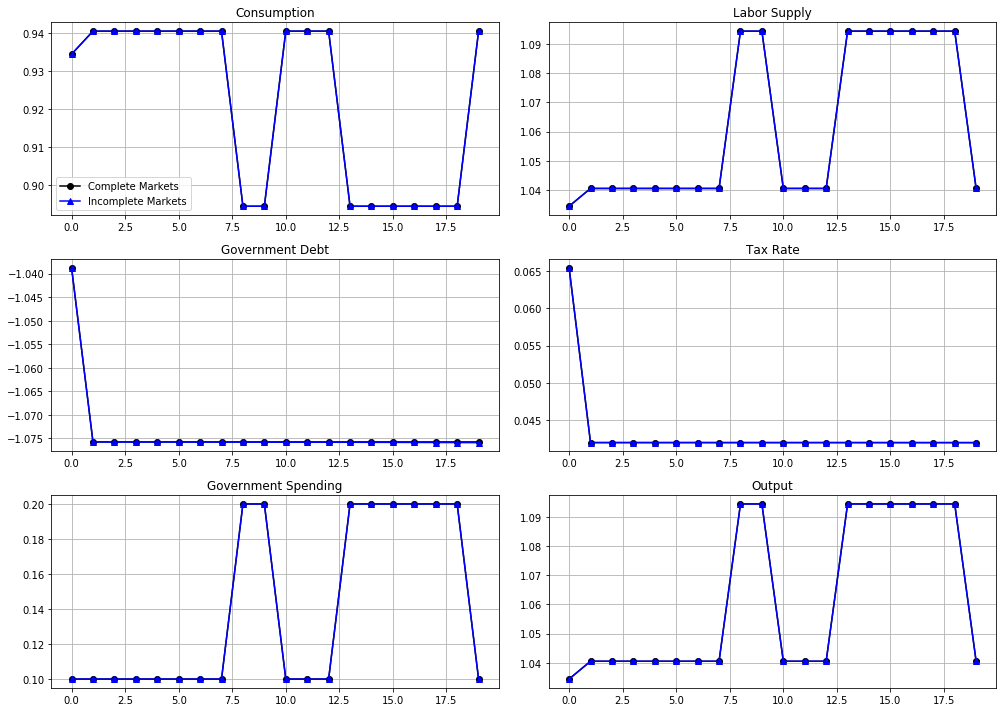

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

μ_grid = np.linspace(-0.09, 0.1, 100)

log_example = CRRAutility()

log_example.transfers = True                        # Government can use transfers
log_sequential = SequentialAllocation(log_example)  # Solve sequential problem
log_bellman = RecursiveAllocationAMSS(log_example, μ_grid, tol_diff=1e-10, tol=1e-12)

T = 20
sHist = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                  0, 0, 0, 1, 1, 1, 1, 1, 1, 0])


sim_seq = log_sequential.simulate(-1.03869841, 0, T, sHist)
sim_bel = log_bellman.simulate(-1.03869841, 0, T, sHist)

titles = ['Consumption', 'Labor Supply', 'Government Debt',
          'Tax Rate', 'Government Spending', 'Output']

# Government spending paths
sim_seq[4] = log_example.G[sHist]
sim_bel[4] = log_example.G[sHist]

# Output paths
sim_seq[5] = log_example.Θ[sHist] * sim_seq[1]
sim_bel[5] = log_example.Θ[sHist] * sim_bel[1]

fig, axes = plt.subplots(3, 2, figsize=(14, 10))

for ax, title, seq, bel in zip(axes.flatten(), titles, sim_seq, sim_bel):
    ax.plot(seq, '-ok', bel, '-^b')
    ax.set(title=title)
    ax.grid()

axes[0, 0].legend(('Complete Markets', 'Incomplete Markets'))
plt.tight_layout()
plt.show()

The Ramsey allocations and Ramsey outcomes are **identical** for the Lucas-Stokey and AMSS economies

This outcome confirms the success of our reverse-engineering exercises

Notice how for $ t \geq 1 $, the tax rate is a constant - so is the par value of government debt

However, output and labor supply are both nontrivial time-invariant functions of the Markov state

## Long simulation

The following graph shows the par value of government debt and the flat rate tax on labor income  for a long simulation for our sample economy

For the **same** realization of a government expenditure path, the graph reports outcomes for two economies

- the gray lines are for the Lucas-Stokey economy with complete markets  
- the blue lines are for the AMSS economy with risk-free one-period debt only  


For both economies, initial government debt due at time $ 0 $ is $ b_0 = .5 $

For the Lucas-Stokey complete markets economy, the government debt plotted is $ b_{t+1}(s_{t+1}) $

- Notice that this is a time-invariant function of the Markov state from the beginning  


For the AMSS incomplete markets economy, the government debt plotted is $ b_{t+1}(s^t) $

- Notice that this is a martingale-like random process that eventually seems to converge to a constant $ \bar b \approx - 1.07 $  
- Notice that the limiting value $ \bar b < 0 $ so that asymptotically the government makes a constant level of risk-free loans to the public  
- In the simulation displayed as well as  other simulations we have run, the par value of government debt converges to about $ 1.07 $ afters between 1400 to 2000 periods  


For the AMSS incomplete markets economy, the marginal tax rate on labor income  $ \tau_t $ converges to a constant

- labor supply and output each converge to time-invariant functions of the Markov state  

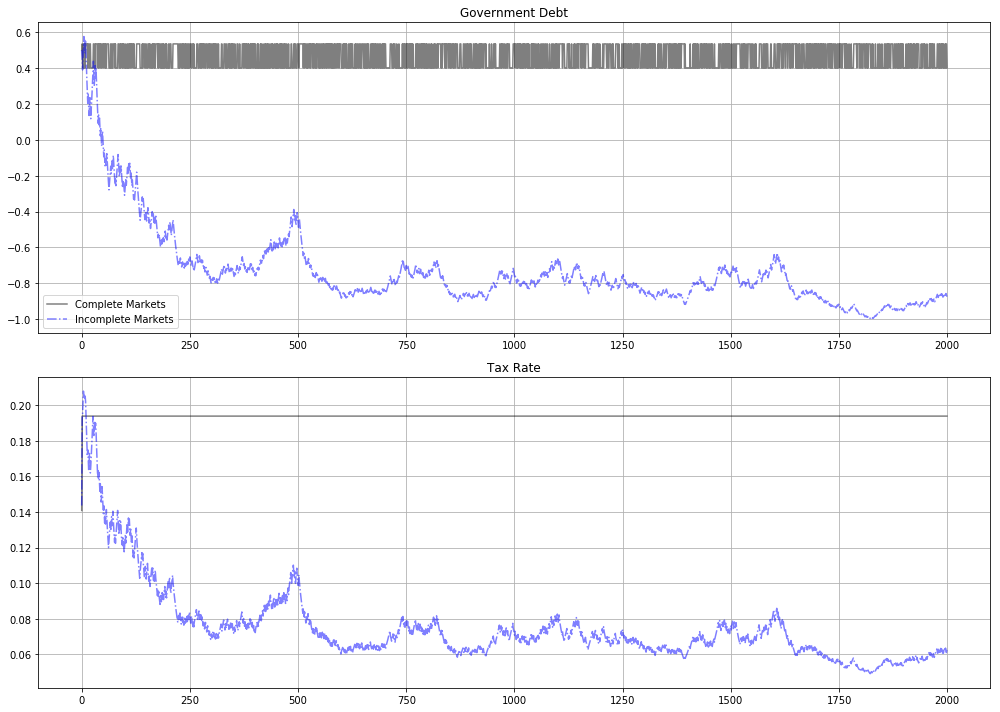

In [10]:
T = 2000  # Set T to 200 periods

sim_seq_long = log_sequential.simulate(0.5, 0, T)
sHist_long = sim_seq_long[-3]
sim_bel_long = log_bellman.simulate(0.5, 0, T, sHist_long)

titles = ['Government Debt', 'Tax Rate']

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

for ax, title, id in zip(axes.flatten(), titles, [2, 3]):
    ax.plot(sim_seq_long[id], '-k', sim_bel_long[id], '-.b', alpha=0.5)
    ax.set(title=title)
    ax.grid()

axes[0].legend(('Complete Markets', 'Incomplete Markets'))
plt.tight_layout()
plt.show()

### Remarks about long simulation

As remarked above, after $ b_{t+1}(s^t) $ has converged to a constant, the measurablility constraints in the AMSS model cease to bind

- the associated Lagrange multipliers on those implementability constraints converge to zero  


This leads us to seek an initial value of government debt $ b_0 $ that renders the measurability constraints slack from time $ t=0 $ onward

- a tell-tale sign of this situation is that the Ramsey planner in a corresponding Lucas-Stokey economy would instruct the government to issue a
  constant level of government debt $ b_{t+1}(s_{t+1}) $ across the two Markov states  


We  now describe how to find such an initial level of government debt

## BEGS approximations of  limiting debt and convergence rate

It is useful to link the outcome of our reverse engineering exercise to limiting approximations constructed by [[BEGS17]](https://lectures.quantecon.org/py/zreferences.html#begs1)

[[BEGS17]](https://lectures.quantecon.org/py/zreferences.html#begs1) used a slightly different notation to represent a generalization of the AMSS model

We’ll introduce a version of their notation so that readers can quickly relate notation that appears in their key formulas to the notation
that we have used

BEGS work with objects $ B_t, {\mathcal B}_t, {\mathcal R}_t, {\mathcal X}_t $ that are related to our notation by

$$
\begin{aligned}
{\mathcal R}_t & = \frac{u_{c,t}}{u_{c,t-1}} R_{t-1}  = \frac{u_{c,t}}{ \beta E_{t-1} u_{c,t}} \\
B_t & = \frac{b_{t+1}(s^t)}{R_t(s^t)} \\
b_t(s^{t-1}) & = {\mathcal R}_{t-1} B_{t-1} \\
{\mathcal B}_t & = u_{c,t} B_t = (\beta E_t u_{c,t+1}) b_{t+1}(s^t) \\
{\mathcal X}_t & = u_{c,t} [g_t - \tau_t n_t]
\end{aligned}
$$

In terms of their notation, equation (44) of [[BEGS17]](https://lectures.quantecon.org/py/zreferences.html#begs1) expresses the time $ t $ state $ s $ government budget constraint as


<a id='equation-eq-fiscal-risk'></a>
$$
{\mathcal B}(s) = {\mathcal R}_\tau(s, s_{-}) {\mathcal B}_{-} + {\mathcal X}_{\tau(s)} (s) \tag{8}
$$

where the dependence on $ \tau $ is to remind us that these objects depend on the tax rate and $ s_{-} $ is last period’s Markov state

BEGS interpret random variations in the right side of [(8)](#equation-eq-fiscal-risk) as a measure of **fiscal risk** composed of

- interest-rate-driven fluctuations in time $ t $ effective payments due on the government portfolio, namely,
  $ {\mathcal R}_\tau(s, s_{-}) {\mathcal B}_{-} $,  and  
- fluctuations in the effective government deficit $ {\mathcal X}_t $  

### Asymptotic mean

BEGS give conditions under which the ergodic mean of $ {\mathcal B}_t $ is


<a id='equation-prelim-formula'></a>
$$
{\mathcal B}^* = - \frac{\rm cov^{\infty}(\mathcal R, \mathcal X)}{\rm var^{\infty}(\mathcal R)} \tag{9}
$$

where the superscript $ \infty $ denotes a moment taken with respect to an ergodic distribution

Formula [(9)](#equation-prelim-formula) presents $ {\mathcal B}^* $ as a regression coefficient of $ {\mathcal X}_t $ on $ {\mathcal R}_t $ in the ergodic
distribution

This regression coefficient emerges as the minimizer for a variance-minimization problem:


<a id='equation-eq-criterion-fiscal'></a>
$$
{\mathcal B}^* = {\rm argmin}_{\mathcal B}  {\rm var} ({\mathcal R} {\mathcal B} + {\mathcal X}) \tag{10}
$$

The minimand in criterion [(10)](#equation-eq-criterion-fiscal) is the  measure of fiscal risk associated with a given tax-debt policy that appears on the right side
of equation [(8)](#equation-eq-fiscal-risk)

Expressing formula [(9)](#equation-prelim-formula) in terms of  our notation tells us that $ \bar b $ should approximately equal


<a id='equation-key-formula'></a>
$$
\hat b = \frac{\mathcal B^*}{\beta E_t u_{c,t+1}} \tag{11}
$$

### Rate of convergence

BEGS also derive the following  approximation to the rate of convergence to $ {\mathcal B}^{*} $ from an arbitrary initial condition

> 
<a id='equation-rate-of-convergence'></a>
$$
\frac{ E_t  ( {\mathcal B}_{t+1} - {\mathcal B}^{*} )} { ( {\mathcal B}_{t} - {\mathcal B}^{*} )} \approx \frac{1}{1 + \beta^2 {\rm var} ({\mathcal R} )} \tag{12}
$$


(See the equation above equation (47) in [[BEGS17]](https://lectures.quantecon.org/py/zreferences.html#begs1))

### Formulas and code details

For our example, we describe some code that we use to compute the steady state mean and the rate of convergence to it

The  values of $ \pi(s) $ are .5, .5

We can then construct $ {\mathcal X}(s), {\mathcal R}(s), u_c(s) $ for our two states using  the definitions above

We can then construct $ \beta E_{t-1} u_c = \beta \sum_s u_c(s) \pi(s) $, $ {\rm cov}({\mathcal R}(s), \mathcal{X}(s)) $ and
$ {\rm var}({\mathcal R}(s)) $ to be plugged into formula [(11)](#equation-key-formula)

We also want to  compute $ {\rm var}({\mathcal X}) $

To compute the variances and covariance, we use the following standard formulas

Temporarily let $ x(s), s =1,2 $ be an arbitrary random variables

Then we define

$$
\begin{aligned}
\mu_x & = \sum_s x(s) \pi(s) \\
{\rm var}(x) &= \left(\sum_s \sum_s x(s)^2 \pi(s) \right) - \mu_x^2 \\
{\rm cov}(x,y)  & = \left(\sum_s x(s) y(s) \pi(s) \right) - \mu_x \mu_y
\end{aligned}
$$

After we compute these moments, we  compute the BEGS approximation to the asymptotic mean $ \hat b $ in formula [(11)](#equation-key-formula)

After that, we move on to compute $ {\mathcal B}^* $ in formula [(9)](#equation-prelim-formula)

We’ll also evaluate  the BEGS criterion [(8)](#equation-eq-fiscal-risk) at the limiting value $ {\mathcal B}^* $


<a id='equation-eqn-jcriterion'></a>
$$
J ( {\mathcal B}^*)=  {\rm var}(\mathcal{R}) \left( {\mathcal B}^* \right)^2 + 2 {\mathcal B}^* {\rm cov}(\mathcal{R},\mathcal{X}) + {\rm var}(\mathcal X) \tag{13}
$$

Here are some functions that we’ll use to compute key objects that we want

In [11]:
def mean(x):
    '''Returns mean for x given initial state'''
    x = np.array(x)
    return x @ u.π[s]

def variance(x):
    x = np.array(x)
    return x**2 @ u.π[s] - mean(x)**2

def covariance(x, y):
    x, y = np.array(x), np.array(y)
    return x * y @ u.π[s] - mean(x) * mean(y)

Now let’s form the two random variables $ {\mathcal R}, {\mathcal X} $ appearing in the BEGS approximating formulas

In [12]:
u = CRRAutility()

s = 0
c = [0.940580824225584, 0.8943592757759343]  # Vector for c
g = u.G       # Vector for g
n = c + g     # Total population
τ = lambda s: 1 + u.Un(1, n[s]) / u.Uc(c[s], 1)

R_s = lambda s: u.Uc(c[s], n[s]) / (u.β * (u.Uc(c[0], n[0]) * u.π[0, 0] + \
                u.Uc(c[1], n[1]) * u.π[1, 0]))
X_s = lambda s: u.Uc(c[s], n[s]) * (g[s] - τ(s) * n[s])

R = [R_s(0), R_s(1)]
X = [X_s(0), X_s(1)]

print(f"R, X = {R}, {X}")

R, X = [1.055169547122964, 1.1670526750992583], [0.06357685646224803, 0.19251010100512958]


Now let’s compute the ingredient of the approximating limit and the approximating rate of convergence

In [13]:
bstar = -covariance(R, X) / variance(R)
div = u.β * (u.Uc(c[0], n[0]) * u.π[s, 0] + u.Uc(c[1], n[1]) * u.π[s, 1])
bhat = bstar / div
bhat

-1.0757585378303758

Print out $ \hat b $ and $ \bar b $

In [14]:
bhat, b_bar

(-1.0757585378303758, -1.0757576567504166)

So we have

In [15]:
bhat - b_bar

-8.810799592140484e-07

These outcomes show that $ \hat b $ does a remarkably good job of approximating $ \bar b $

Next, let’s compute the BEGS fiscal criterion that $ \hat b $ is minimizing

In [16]:
Jmin = variance(R) * bstar**2 + 2 * bstar * covariance(R, X) + variance(X)
Jmin

-9.020562075079397e-17

This is *machine zero*, a verification that $ \hat b $ succeeds in minimizing the nonnegative fiscal cost criterion $ J ( {\mathcal B}^*) $ defined in
BEGS and in equation [(13)](#equation-eqn-jcriterion) above

Let’s push our luck and compute the mean reversion speed in the formula above equation (47) in [[BEGS17]](https://lectures.quantecon.org/py/zreferences.html#begs1)

In [17]:
den2 = 1 + (u.β**2) * variance(R)
speedrever = 1/den2
print(f'Mean reversion speed = {speedrever}')

Mean reversion speed = 0.9974715478249827


Now let’s compute the implied mean time to get to within .01 of the limit

In [18]:
ttime = np.log(.01) / np.log(speedrever)
print(f"Time to get within .01 of limit = {ttime}")

Time to get within .01 of limit = 1819.0360880098472


The slow rate of convergence and the implied time of getting within one percent of the limiting value do a good job of approximating
our long simulation above